# Inicializar


In [ ]:
# instalar as dependências
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install ucimlrepo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, KFold,cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer,confusion_matrix, classification_report, get_scorer_names
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score, precision_score
import time
from pandas.plotting import scatter_matrix

## Começando

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
wine = pd.concat([wine_quality.data.features , wine_quality.data.targets ], axis=1)
features_names=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',	'free_sulfur_dioxide'	,'total_sulfur_dioxide',	'density'	,'pH'	,'sulphates',	'alcohol',	'quality']

### Estatísticas

In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000



*   Os valores máximos das colunas "residual_sugar","free_sulfur_dioxide" e "total_sulfur_dioxide" são muito maiores que a mediana.
*   Essa observação indica que há muitos outliers no nosso dataset.




### Entendendo a target *alcohol*

In [ ]:
wine.alcohol.describe()

count    4898.000000
mean       10.514267
std         1.230621
min         8.000000
25%         9.500000
50%        10.400000
75%        11.400000
max        14.200000
Name: alcohol, dtype: float64


*  A variável alvo/variável dependente é de natureza discreta e contínua.
*   "alcohol" está com valores entre 8 e 14,2.

In [ ]:
wine.alcohol.value_counts()

9.400000     229
9.500000     228
9.200000     199
9.000000     185
10.000000    162
            ... 
14.050000      1
11.366667      1
11.066667      1
11.350000      1
12.050000      1
Name: alcohol, Length: 103, dtype: int64



* Esse comando nos mostra os valores em ordem descrescente.
* "alcohol" tem a maior parte dos valores concentrados entre 9 e 11.



### Checando a existência de valores faltantes

<Axes: >

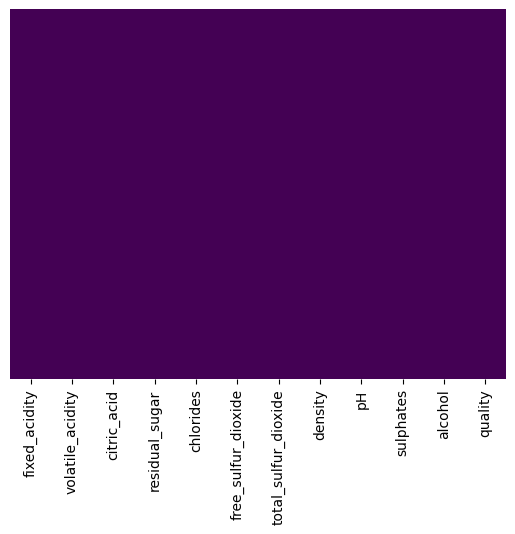

In [ ]:
sns.heatmap(wine.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

* Dataset não tem valores faltantes.
* Caso tivesse algum valor faltante, seria mostrado com uma cor diferente da roxa.

### Checando a correlação linear entre as features

<Axes: >

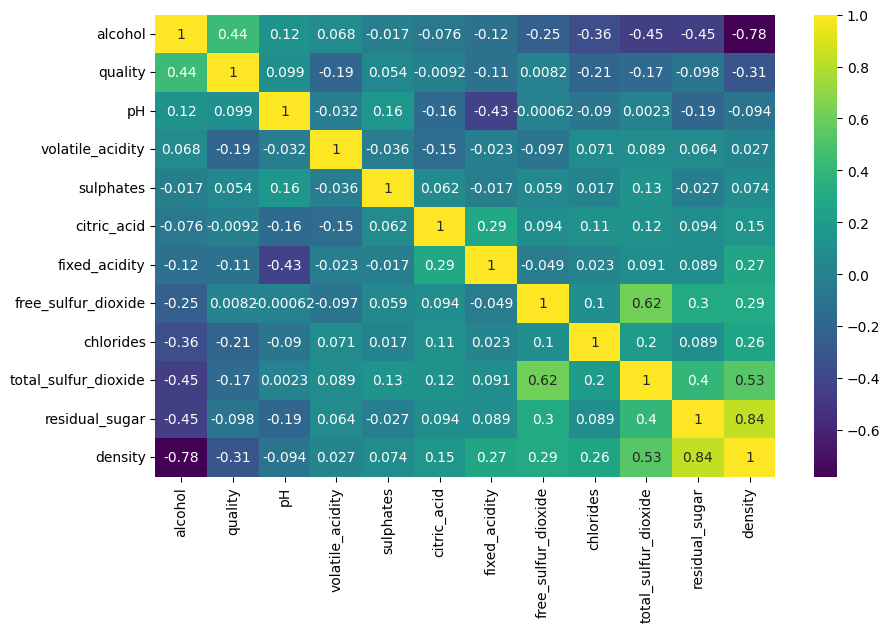

In [ ]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = wine.corr().nlargest(k, 'alcohol')['alcohol'].index
cm = wine[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')


*   Aqui podemos inferir que a "quality" tem forte correlação positiva com o "alcohol", enquanto tem forte correlação negativa com o "density".
*   “sulphates” quase não têm correlação com "alcohol".
* Como a correlação é quase zero, podemos inferir que não há relação linear entre esses dois preditores. No entanto, é seguro descartar esses recursos caso você esteja aplicando o modelo de regressão linear ao conjunto de dados.

### Checando Outliers

In [ ]:
l = wine.columns.values
l

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [ ]:
number_of_columns=12
number_of_rows = 12
number_of_rows

12

In [ ]:
plt.figure(figsize=(number_of_columns,5*number_of_rows))

<Figure size 1200x6000 with 0 Axes>

<Figure size 1200x6000 with 0 Axes>

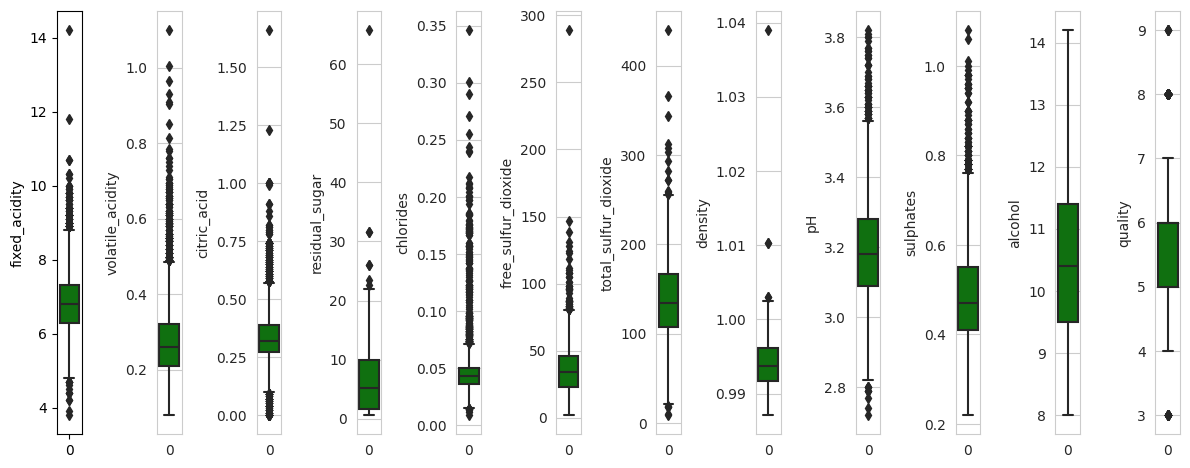

In [ ]:
l = wine.columns.values
number_of_columns=12
number_of_rows = 12
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(wine[l[i]],color='green',orient='v')
    plt.ylabel(l[i],fontsize='10')
    plt.tight_layout()

*   Somente a coluna target "alcohol" não mostra outliers

### Checagem do skewness

In [ ]:
wine.skew()

fixed_acidity           0.647751
volatile_acidity        1.576980
citric_acid             1.281920
residual_sugar          1.077094
chlorides               5.023331
free_sulfur_dioxide     1.406745
total_sulfur_dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64



*   Percebemos uma assimetria positiva em todas as colunas. Entretanto, não há valores tão altos, dessa forma não necessário tratar a assimetria pra todos os casos.
*   "total_sulfur_dioxide", "alcohol" e "pH" são as colunas que tem menor assimetria.



### Checando scatter_matrix

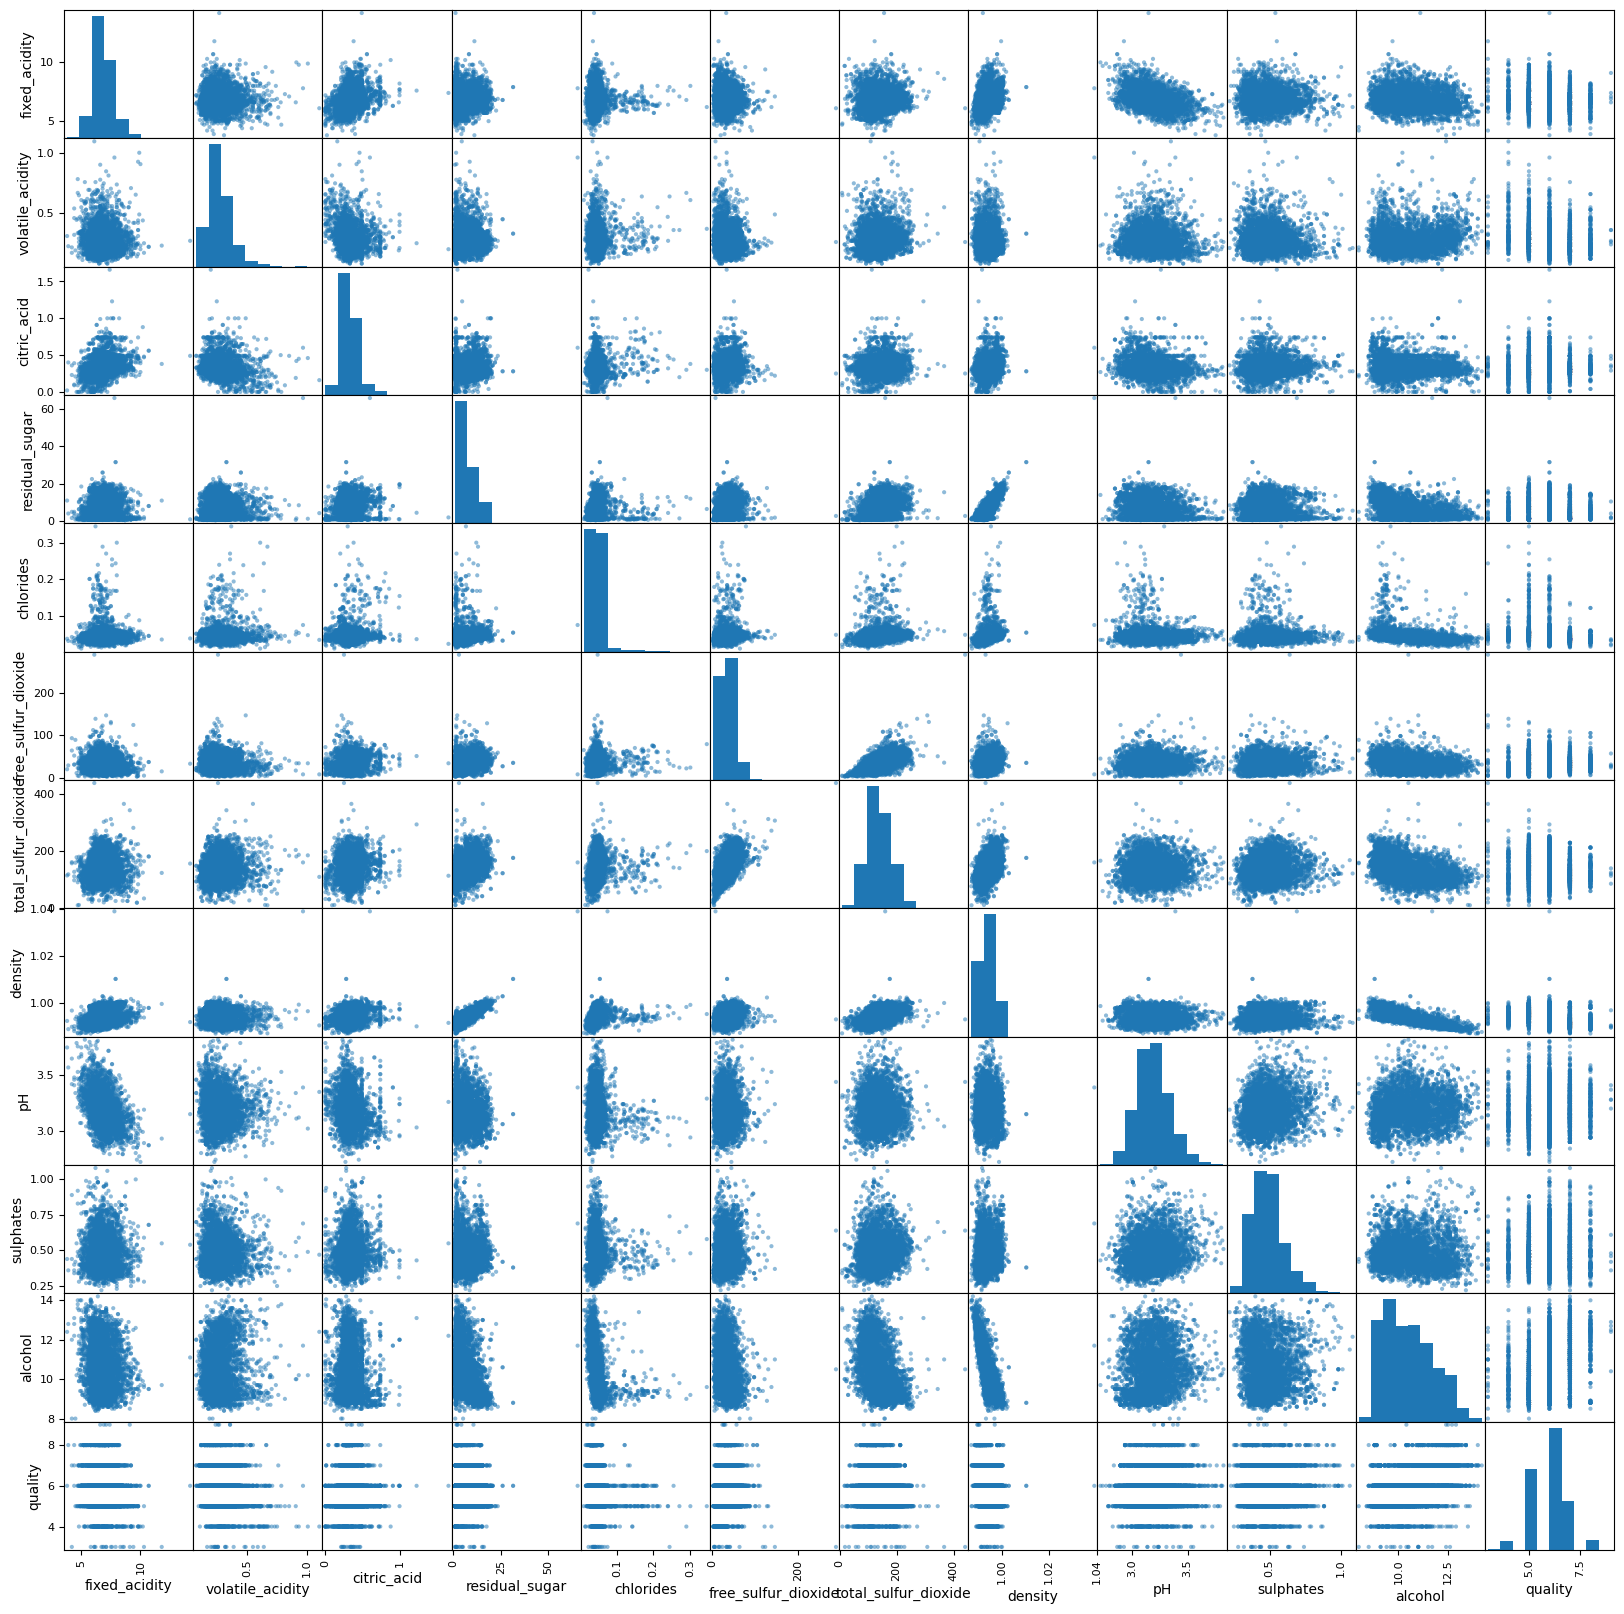

In [ ]:
scatter_matrix(wine, alpha=0.5, figsize=(20, 20))
plt.show()

In [ ]:
features_plot1 = ['alcohol', 'residual_sugar']
features_plot2 = ['alcohol', 'density']
features_plot3 = ['alcohol', 'quality']


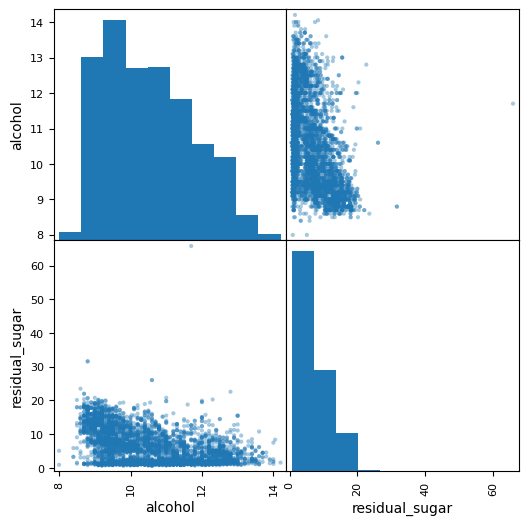

In [ ]:
scatter_matrix(wine[features_plot1], alpha=0.4, figsize=(6, 6))
plt.show()

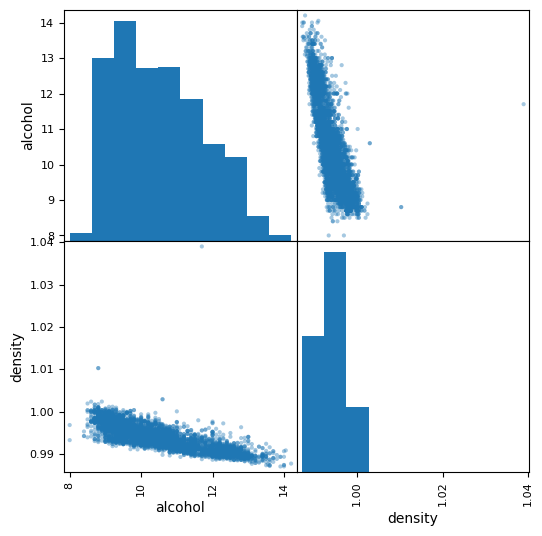

In [ ]:
scatter_matrix(wine[features_plot2], alpha=0.4, figsize=(6, 6))
plt.show()

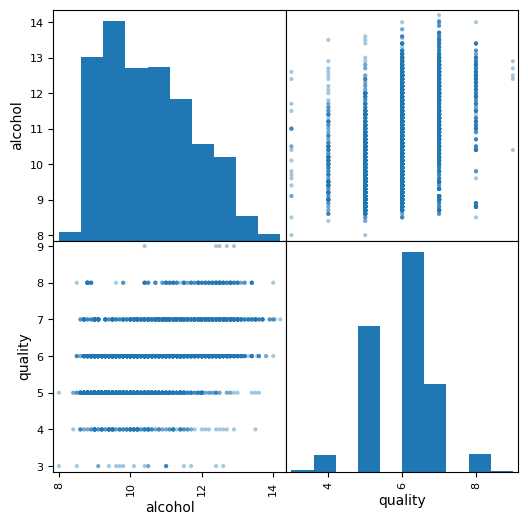

In [ ]:
scatter_matrix(wine[features_plot3], alpha=0.4, figsize=(6, 6))
plt.show()

## Pré-processamento

### Há valores nulos?

In [ ]:
wine.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 Não há valores nulos, portanto não será necessário tirar linhas

### Retirando colunas que não tem correlação nenhuma com a coluna target

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
wine = pd.concat([wine_quality.data.features , wine_quality.data.targets ], axis=1)
features_names=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',	'free_sulfur_dioxide'	,'total_sulfur_dioxide',	'density'	,'pH']

In [ ]:
wine_pre_processed = wine.drop('sulphates', axis = 1)

In [ ]:
wine_pre_processed.shape

(4898, 11)

In [ ]:
def remove_outliers_iqr(dataframe, colunas=None):
    """
    Remove outliers de um DataFrame usando a regra do IQR (Intervalo Interquartil) para as colunas especificadas.
    Se nenhuma coluna for especificada, todas as colunas numéricas serão processadas.

    Args:
    dataframe (pd.DataFrame): O DataFrame contendo os dados com possíveis outliers.
    colunas (list): Lista das colunas a serem processadas. Se None, todas as colunas numéricas serão processadas.

    Returns:
    pd.DataFrame: Um novo DataFrame com outliers removidos.
    """
    # Cria um DataFrame de cópia para evitar modificações no original
    df_cleaned = dataframe.copy()

    # Se colunas não for especificada, seleciona todas as colunas numéricas
    if colunas is None:
        colunas = df_cleaned.select_dtypes(include=['number']).columns.tolist()

    # Itera sobre as colunas especificadas
    for col in colunas:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove os outliers da coluna
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [ ]:
wine_pre_processed= remove_outliers_iqr(wine_pre_processed, features_names)

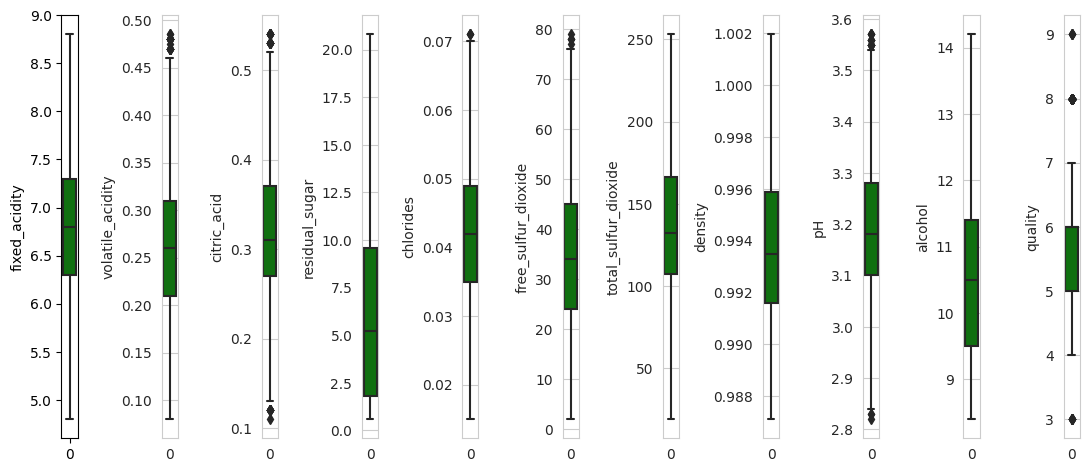

In [ ]:
l = wine_pre_processed.columns.values
number_of_columns=12
number_of_rows = 12
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(wine_pre_processed[l[i]],color='green',orient='v')
    plt.ylabel(l[i],fontsize='10')
    plt.tight_layout()

In [ ]:
wine_pre_processed.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
wine_pre_processed.shape

(4071, 11)

### Corrigindo a assimetria

In [ ]:
colunas_box_cox = ['volatile_acidity', 'chlorides', 'free_sulfur_dioxide']
#colunas_quantile = ['residual_sugar', 'density','alcohol']
#colunas_box_cox=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides',	'free_sulfur_dioxide'	,'total_sulfur_dioxide',	'density'	,'pH'	,	'alcohol']

In [ ]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method = 'box-cox')
pt.fit(wine_pre_processed[colunas_box_cox])
wine_pre_processed[colunas_box_cox] = pt.transform(wine_pre_processed[colunas_box_cox])

In [ ]:
wine_pre_processed.skew()

fixed_acidity           0.164060
volatile_acidity       -0.011320
citric_acid             0.374180
residual_sugar          0.737489
chlorides              -0.019602
free_sulfur_dioxide    -0.057751
total_sulfur_dioxide    0.300178
density                 0.304256
pH                      0.195610
alcohol                 0.386442
quality                 0.169765
dtype: float64

### One hot encondig

In [ ]:
def dummy(df, columns):
  dummy_variables = []
  for column in columns:
      dummies = pd.get_dummies(df[column], prefix=column)
      dummy_variables.append(dummies)
  return dummy_variables

In [ ]:
cat_features = ['quality']

In [ ]:
wine_pre_processed[cat_features].nunique()

quality    7
dtype: int64

In [ ]:
dummy_variables = dummy(wine_pre_processed, cat_features)
wine_pre_processed = pd.concat([wine_pre_processed] + dummy_variables, axis=1)
wine_pre_processed = wine_pre_processed.drop(cat_features, axis=1)

In [ ]:
wine_pre_processed.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,alcohol,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9
0,7.0,0.175940,0.36,20.7,0.296166,0.714077,170.0,1.0010,3.00,8.8,0,0,0,1,0,0,0
1,6.3,0.547703,0.34,1.6,0.689189,-1.459687,132.0,0.9940,3.30,9.5,0,0,0,1,0,0,0
2,8.1,0.302524,0.40,6.9,0.786590,-0.243457,97.0,0.9951,3.26,10.1,0,0,0,1,0,0,0
3,7.2,-0.361055,0.32,8.5,1.554653,0.833467,186.0,0.9956,3.19,9.9,0,0,0,1,0,0,0
4,7.2,-0.361055,0.32,8.5,1.554653,0.833467,186.0,0.9956,3.19,9.9,0,0,0,1,0,0,0


### Funções necessárias

In [ ]:
import plotly.express as px
class LinearRegressionTest:
    def __init__(self, learning_rate =0.04,iterations=10000, convergence_tol=1e-5, plot_cost=False):
        assert iterations > 0, "Iterations must be greater than 0"
        self.learning_rate = learning_rate
        self.convergence_tol = convergence_tol
        self.W = None
        self.b = None
        self.iterations = iterations
        self.plot_cost = plot_cost

    def initialize_parameters(self, n_features):
        """
        Initialize model parameters.

        Parameters:
            n_features (int): The number of features in the input data.
        """
        self.W = np.random.randn(n_features) * 0.01
        self.b = 0

    def forward(self, X):
        """
        Compute the forward pass of the linear regression model.

        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predictions of shape (m,).
        """
        return np.dot(X, self.W) + self.b

    def compute_cost(self, predictions):
        """
        Compute the mean squared error cost.

        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Returns:
            float: Mean squared error cost.
        """
        m = len(predictions)
        cost = np.sum(np.square(predictions - self.y)) / (2 * m)
        return cost

    def backward(self, predictions):
        """
        Compute gradients for model parameters.

        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Updates:
            numpy.ndarray: Gradient of W.
            float: Gradient of b.
        """
        m = len(predictions)
        self.dW = np.dot(predictions - self.y, self.X) / m
        self.db = np.sum(predictions - self.y) / m

    def fit(self, X, y):
        """
        Fit the linear regression model to the training data.

        Parameters:
            X (numpy.ndarray): Training input data of shape (m, n_features).
            y (numpy.ndarray): Training labels of shape (m,).
            iterations (int): The number of iterations for gradient descent.
            plot_cost (bool, optional): Whether to plot the cost during training. Defaults to True.

        Raises:
            AssertionError: If input data and labels are not NumPy arrays or have mismatched shapes.

        Plots:
            Plotly line chart showing cost vs. iteration (if plot_cost is True).
        """
        assert isinstance(X, np.ndarray), "X must be a NumPy array"
        assert isinstance(y, np.ndarray), "y must be a NumPy array"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"

        self.X = X
        self.y = y
        self.initialize_parameters(X.shape[1])
        costs = []

        for i in range(self.iterations):
            predictions = self.forward(X)
            cost = self.compute_cost(predictions)
            self.backward(predictions)
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db
            costs.append(cost)

            if i % 100 == 0:
                print(f'Iteration: {i}, Cost: {cost}')

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f'Converged after {i} iterations.')
                break

        if self.plot_cost:
            fig = px.line(y=costs, title="Cost vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Cost")
            )

            fig.show()

    def predict(self, X):
        """
        Predict target values for new input data.

        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predicted target values of shape (m,).
        """
        return self.forward(X)

In [ ]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std

    return X_train, X_test

def standardize_data2(X):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
    Returns:
        Tuple of standardized training and testing data.
    """
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std

    return X

In [ ]:
class RegressionMetrics:
    def mean_squared_error(y_true, y_pred):
        """
        Calculate the Mean Squared Error (MSE).

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The Mean Squared Error.
        """
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mse = np.mean((y_true - y_pred) ** 2)
        return mse

    def root_mean_squared_error(y_true, y_pred):
        """
        Calculate the Root Mean Squared Error (RMSE).

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The Root Mean Squared Error.
        """
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mse = RegressionMetrics.mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        return rmse

    def r_squared(y_true, y_pred):
        """
        Calculate the R-squared (R^2) coefficient of determination.

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The R-squared (R^2) value.
        """
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2
    def variance(y_pred):
        variance = np.mean(np.square(y_pred - np.mean(y_pred)))
        return variance


In [ ]:
class KFoldCustom:
    def __init__(self, n_splits=5, shuffle=False, random_state=None):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state

    def split(self, X):
        n_samples = len(X)
        indices = np.arange(n_samples)

        if self.shuffle:
            if self.random_state is not None:
                np.random.seed(self.random_state)
            np.random.shuffle(indices)

        fold_sizes = n_samples // self.n_splits
        leftover = n_samples % self.n_splits
        folds = []

        start = 0
        for i in range(self.n_splits):
            stop = start + fold_sizes
            if i < leftover:
                stop += 1

            test_indices = indices[start:stop]
            train_indices = np.concatenate([indices[:start], indices[stop:]])

            folds.append((train_indices, test_indices))
            start = stop

        return folds


In [ ]:
def cross_validationTest(model, X, y, k):
    results = []

    kf = KFoldCustom(n_splits=k, shuffle=True, random_state=42)

    for train_indices, test_indices in kf.split(X):
        start_time = time.time()

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
        rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
        r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

        execution_time = time.time() - start_time

        results.append({
            'Mean Squared Error (MSE)': mse_value,
            'Root Mean Squared Error (RMSE)': rmse_value,
            'R-squared (Coefficient of Determination)': r_squared_value,
            'Tempo': execution_time
        })

    results_df = pd.DataFrame(results)
    return results_df

## Divisão e treino

In [ ]:
X = wine_pre_processed.drop('alcohol', axis=1)
y = wine_pre_processed['alcohol']

X_np = X.values
y_np = y.values

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size = 0.3, random_state = 42)

X_train, X_test = standardize_data(X_train, X_test)

### Tópico 1

Regressão linear e cross validation

In [ ]:
# Regressão implementada
lr = LinearRegressionTest()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
results = []

mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

results.append({
  'Mean Squared Error (MSE)': mse_value,
  'Root Mean Squared Error (RMSE)': rmse_value,
  'R-squared (Coefficient of Determination)': r_squared_value,
})

pd.DataFrame(results)

Iteration: 0, Cost: 56.85997023139344
Iteration: 100, Cost: 0.1853219786933496
Iteration: 200, Cost: 0.12518860683944502
Iteration: 300, Cost: 0.09931830994428655
Iteration: 400, Cost: 0.0840263651289308
Iteration: 500, Cost: 0.07497277773489562
Iteration: 600, Cost: 0.06961136459508423
Iteration: 700, Cost: 0.06643628844207213
Iteration: 800, Cost: 0.06455596890661955
Converged after 869 iterations.


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination)
0,0.130675,0.36149,0.91569


In [ ]:
## Regressão da biblioteca
ln = LinearRegression()
ln.fit(X_train, y_train)
y_pred=ln.predict(X_test)

results = []

mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

results.append({
  'Mean Squared Error (MSE)': mse_value,
  'Root Mean Squared Error (RMSE)': rmse_value,
  'R-squared (Coefficient of Determination)': r_squared_value,
})

pd.DataFrame(results)


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination)
0,0.129029,0.359206,0.916752


In [ ]:
## Regressão implementada com cross validation implementada

lr = LinearRegressionTest()

cross_validationTest(lr,X_train,y_train,k=5)

Iteration: 0, Cost: 56.9636578084844
Iteration: 100, Cost: 0.1831895544874681
Iteration: 200, Cost: 0.12454563695508672
Iteration: 300, Cost: 0.0997173501933794
Iteration: 400, Cost: 0.08506983391116438
Iteration: 500, Cost: 0.0764144679010463
Iteration: 600, Cost: 0.07129873041650607
Iteration: 700, Cost: 0.06827496790409969
Iteration: 800, Cost: 0.06648769927841756
Converged after 859 iterations.
Iteration: 0, Cost: 56.84780216768974
Iteration: 100, Cost: 0.18148486913870712
Iteration: 200, Cost: 0.12211326089295207
Iteration: 300, Cost: 0.09689882158016815
Iteration: 400, Cost: 0.08196481040671605
Iteration: 500, Cost: 0.07310787944933739
Iteration: 600, Cost: 0.06785411531233956
Iteration: 700, Cost: 0.06473758432609031
Iteration: 800, Cost: 0.06288884952718989
Converged after 867 iterations.
Iteration: 0, Cost: 56.813800397249985
Iteration: 100, Cost: 0.18574277508899514
Iteration: 200, Cost: 0.12433813328130666
Iteration: 300, Cost: 0.09821016659511396
Iteration: 400, Cost: 0.082

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination),Tempo
0,0.113334,0.336651,0.922672,0.224015
1,0.143671,0.379040,0.897429,0.214322
2,0.139017,0.372850,0.910571,0.209761
3,0.121586,0.348692,0.915259,0.208700
4,0.129136,0.359355,0.910502,0.198805


In [ ]:
## Regressão da biblioteca com cross validation da biblioteca
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

scoring = ['r2', 'neg_mean_squared_error','neg_root_mean_squared_error']

scores = cross_validate(LinearRegression(), X_train, y_train, cv= kf, scoring=scoring)

results = []

for i in range(len(scores['fit_time'])):
  results.append({
    'Mean Squared Error (MSE)': scores['test_neg_mean_squared_error'][i],
    'Root Mean Squared Error (RMSE)': scores['test_neg_root_mean_squared_error'][i],
    'R-squared (Coefficient of Determination)': scores['test_r2'][i],
    'Tempo': (scores['fit_time'][i] + scores['score_time'][i])
  })

results_df = pd.DataFrame(results)
results_df

Fold:1, Train set: 2279, Test set:570
Fold:2, Train set: 2279, Test set:570
Fold:3, Train set: 2279, Test set:570
Fold:4, Train set: 2279, Test set:570
Fold:5, Train set: 2280, Test set:569


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination),Tempo
0,-0.108009,-0.328647,0.926305,0.022284
1,-0.138019,-0.371510,0.901464,0.008173
2,-0.136005,-0.368789,0.912509,0.018380
3,-0.117135,-0.342249,0.918361,0.015164
4,-0.129175,-0.359409,0.910475,0.017419


### Tópico 2

Regressão Linear penalizado por L2 : RidgeRegression

In [ ]:
import numpy as np

class RidgeRegression:
    def __init__(self, alpha=0.1, learning_rate=0.04, max_iterations=5000, convergence_tol=1e-6):
        """
        Inicializa um modelo de Ridge Regression.

        Parâmetros:
            alpha (float): A força de regularização (lambda).
            learning_rate (float): A taxa de aprendizado para a descida de gradiente.
            max_iterations (int): O número máximo de iterações para a descida de gradiente.
            convergence_tol (float): A tolerância de convergência para parar as iterações.
        """
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.convergence_tol = convergence_tol
        self.W = None  # Coeficientes (pesos) para regressão linear
        self.b = None  # Interceptação (viés) para regressão linear

    def initialize_parameters(self, n_features):
        """
        Inicializa os parâmetros do modelo.

        Parâmetros:
            n_features (int): O número de características nos dados de entrada.
        """
        self.W = np.random.randn(n_features)  # Inicializa os pesos com valores aleatórios
        self.b = 0  # Inicializa o viés como 0

    def compute_cost(self, X, y):
        """
        Calcula o custo da regressão Ridge.

        Parâmetros:
            X (numpy.ndarray): Dados de entrada de forma (m, n_features).
            y (numpy.ndarray): Rótulos de treinamento de forma (m,).

        Retorna:
            float: O custo da regressão Ridge.
        """
        m = len(y)
        predictions = np.dot(X, self.W) + self.b
        mse = np.sum(np.square(predictions - y)) / (2 * m)
        regularization_term = (self.alpha / (2 * m)) * np.sum(np.square(self.W))
        cost = mse + regularization_term
        return cost

    def gradient_descent(self, X, y):
        """
        Realiza uma iteração da descida de gradiente.

        Parâmetros:
            X (numpy.ndarray): Dados de entrada de forma (m, n_features).
            y (numpy.ndarray): Rótulos de treinamento de forma (m,).

        Retorna:
            numpy.ndarray: Os gradientes dos pesos (W) e do viés (b).
        """
        m = len(y)
        predictions = np.dot(X, self.W) + self.b
        gradient_W = (1 / m) * (np.dot(X.T, (predictions - y)) + self.alpha * self.W)
        gradient_b = (1 / m) * np.sum(predictions - y)
        return gradient_W, gradient_b

    def fit(self, X, y):
        """
        Ajusta o modelo de Ridge Regression aos dados de treinamento usando descida de gradiente.

        Parâmetros:
            X (numpy.ndarray): Dados de entrada de treinamento de forma (m, n_features).
            y (numpy.ndarray): Rótulos de treinamento de forma (m,).
        """
        self.initialize_parameters(X.shape[1])  # Inicializa os parâmetros
        prev_cost = float('inf')

        for i in range(self.max_iterations):
            gradient_W, gradient_b = self.gradient_descent(X, y)
            self.W -= self.learning_rate * gradient_W
            self.b -= self.learning_rate * gradient_b
            cost = self.compute_cost(X, y)

            if abs(prev_cost - cost) < self.convergence_tol:
                print(f'Converged after {i} iterations.')
                break

            prev_cost = cost

    def predict(self, X):
        """
        Prevê valores-alvo para novos dados de entrada.

        Parâmetros:
            X (numpy.ndarray): Dados de entrada de forma (m, n_features).

        Retorna:
            numpy.ndarray: Valores-alvo previstos de forma (m,).
        """
        return np.dot(X, self.W) + self.b  # Previsão de regressão linear


In [ ]:
# RidgeRegressionOptimized implementada
rr = RidgeRegression(alpha=0.01)
rr.fit(X_train, y_train)

y_pred = rr.predict(X_test)
results = []

mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)


results.append({
  'Mean Squared Error (MSE)': mse_value,
  'Root Mean Squared Error (RMSE)': rmse_value,
  'R-squared (Coefficient of Determination)': r_squared_value,
})

pd.DataFrame(results)



Converged after 1263 iterations.


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination)
0,0.128634,0.358656,0.917007


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
## Ridge Regression da biblioteca
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

results = []

mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

results.append({
  'Mean Squared Error (MSE)': mse_value,
  'Root Mean Squared Error (RMSE)': rmse_value,
  'R-squared (Coefficient of Determination)': r_squared_value,
})

pd.DataFrame(results)

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination)
0,0.129028,0.359205,0.916753


In [ ]:
## Regressão implementada com cross validation implementada
model = RidgeRegression(alpha=0.01)

df_result = cross_validationTest(model,X_train,y_train,k=5)
df_result

Converged after 1256 iterations.
Converged after 1189 iterations.
Converged after 1276 iterations.
Converged after 1010 iterations.
Converged after 1576 iterations.


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination),Tempo
0,0.108796,0.329843,0.925768,0.533618
1,0.139008,0.372838,0.900758,0.575097
2,0.136161,0.369000,0.912408,0.430049
3,0.117476,0.342747,0.918124,0.386124
4,0.128242,0.358109,0.911122,0.739916


In [ ]:
## Ridge Regression da biblioteca com cross validation da biblioteca
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

scoring = ['r2', 'neg_mean_squared_error','neg_root_mean_squared_error']

scores = cross_validate(Ridge(alpha=0.01), X_train, y_train, cv= kf, scoring=scoring)

results = []

for i in range(len(scores['fit_time'])):
  results.append({
    'Mean Squared Error (MSE)': scores['test_neg_mean_squared_error'][i],
    'Root Mean Squared Error (RMSE)': scores['test_neg_root_mean_squared_error'][i],
    'R-squared (Coefficient of Determination)': scores['test_r2'][i],
    'Tempo': (scores['fit_time'][i] + scores['score_time'][i])
  })

results_df = pd.DataFrame(results)
results_df

Fold:1, Train set: 2279, Test set:570
Fold:2, Train set: 2279, Test set:570
Fold:3, Train set: 2279, Test set:570
Fold:4, Train set: 2279, Test set:570
Fold:5, Train set: 2280, Test set:569


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination),Tempo
0,-0.107870,-0.328435,0.926400,0.010345
1,-0.138063,-0.371569,0.901433,0.010524
2,-0.136037,-0.368832,0.912488,0.008482
3,-0.116845,-0.341826,0.918563,0.002761
4,-0.129025,-0.359201,0.910579,0.008391


In [ ]:
def cross_validationTestRMSE(X, y,alphas, k=5):

    # Initialize lists to store MSE scores for each fold
    results = []

    # Calculate the size of each fold
    out = pd.DataFrame(columns = ['RMSE'])
    best_alpha = float('inf')
    best_rmse = float('inf')

    kf = KFoldCustom(n_splits=k, shuffle=True, random_state=42)

    for alpha in alphas:
      results = []
      model = RidgeRegression(alpha=alpha)
      # Split data into k folds
      for train_indices, test_indices in kf.split(X):
          start_time = time.time()

          X_train, X_test = X[train_indices], X[test_indices]
          y_train, y_test = y[train_indices], y[test_indices]

          #X_train, X_test = standardize_data(X_train, X_test)

          model.fit(X_train, y_train)

          # Make predictions and calculate MSE for this fold
          y_pred = model.predict(X_test)

          rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
          r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

          results.append({
            'RMSE': rmse_value,
            'R2': r_squared_value,
          })

      results_df = pd.DataFrame(results)

      avg_rmse = results_df['RMSE'].mean()
      avg_r2 = results_df['R2'].mean()

      out.loc[alpha, 'RMSE'] = avg_rmse
      out.loc[alpha, 'R2'] = avg_r2

      if(avg_rmse < best_rmse):
        best_alpha = alpha
        best_rmse = avg_rmse

    return best_alpha, out

In [ ]:
alphas = [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5]
alphas = alphas +list(range(1, 2000,10))

In [ ]:
len(alphas)

206

In [ ]:
alphas = [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5]
alphas = alphas +list(range(1, 2000,10))

best_alpha, out = cross_validationTestRMSE(X_train, y_train, alphas, k=5)


Converged after 1256 iterations.
Converged after 1189 iterations.
Converged after 1276 iterations.
Converged after 1010 iterations.
Converged after 1576 iterations.
Converged after 1256 iterations.
Converged after 1189 iterations.
Converged after 1276 iterations.
Converged after 1010 iterations.
Converged after 1576 iterations.
Converged after 1256 iterations.
Converged after 1189 iterations.
Converged after 1276 iterations.
Converged after 1010 iterations.
Converged after 1576 iterations.
Converged after 1256 iterations.
Converged after 1188 iterations.
Converged after 1275 iterations.
Converged after 1010 iterations.
Converged after 1576 iterations.
Converged after 1255 iterations.
Converged after 1188 iterations.
Converged after 1275 iterations.
Converged after 1009 iterations.
Converged after 1575 iterations.
Converged after 1252 iterations.
Converged after 1184 iterations.
Converged after 1271 iterations.
Converged after 1006 iterations.
Converged after 1572 iterations.
Converged 

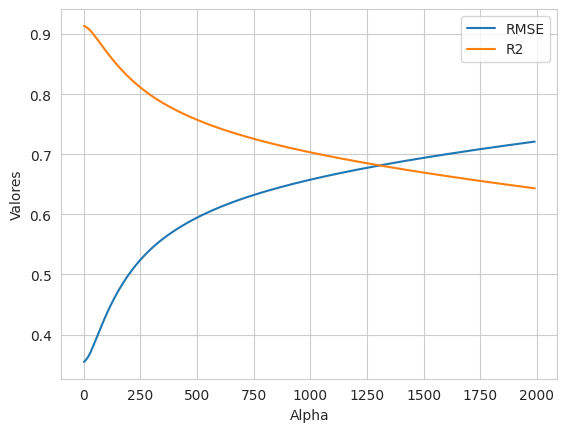

In [ ]:
plt.plot(alphas, out['RMSE'], label='RMSE')
plt.legend()
plt.plot(alphas, out['R2'], label='R2')
plt.legend()
plt.ylabel('Valores')
plt.xlabel('Alpha')

plt.show()

In [ ]:
best_alpha

0.0001

In [ ]:
out['RMSE'][best_alpha]

0.3545053370918714

In [ ]:
out['R2'][best_alpha]

0.9136368070778282

In [ ]:
#Aplicando o best_alpha
## Regressão implementada com cross validation implementada
rr = RidgeRegression(alpha=best_alpha)

df_result = cross_validationTest(rr,X_test,y_test,k=5)
df_result

Converged after 1042 iterations.
Converged after 1310 iterations.
Converged after 1392 iterations.
Converged after 1309 iterations.
Converged after 1274 iterations.


,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination),Tempo
0,0.115102,0.339266,0.924888,0.276427
1,0.146016,0.382120,0.897713,0.413519
2,0.121007,0.347860,0.921733,0.330345
3,0.140426,0.374735,0.920704,0.257111
4,0.128227,0.358088,0.912549,0.338759


In [ ]:
#Aplicando o best_alpha
## Regressão implementada com cross validation implementada
rr = Ridge(alpha=best_alpha)

df_result = cross_validationTest(rr,X_test,y_test,k=5)
df_result

,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination),Tempo
0,0.115763,0.340240,0.924457,0.005711
1,0.145570,0.381536,0.898025,0.007225
2,0.120233,0.346746,0.922234,0.009104
3,0.138794,0.372551,0.921626,0.002060
4,0.128156,0.357988,0.912597,0.005778


### Tópico 3

Aplicando PCA

In [ ]:
X.shape

(4071, 16)

In [ ]:
X = wine_pre_processed.drop('alcohol', axis=1)
y = wine_pre_processed['alcohol']

X_np = X.values
y_np = y.values

X_scaled = standardize_data2(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19276068, 0.29685814, 0.3895632 , 0.47281014, 0.5403133 ,
       0.60675114, 0.67102945, 0.73439371, 0.79715357, 0.85319443,
       0.89880322, 0.94104291, 0.97722108, 0.99584495, 1.        ,
       1.        ])

In [ ]:
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_pca, y_np, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn import model_selection

cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 42)  # 10 kfold

lm = LinearRegression()

In [ ]:
RMSE = []
R2 = []

In [ ]:
best_rmse = float('inf')
scores = {}
for i in np.arange(1, X_reduced_train.shape[1] + 1):

    scoring = ['r2','neg_root_mean_squared_error']

    scores = cross_validate(lm, X_reduced_train[:,:i], y_train.ravel(), cv= cv_10, scoring=scoring, return_estimator=True)

    rmse = -1*scores['test_neg_root_mean_squared_error'].mean()
    r2 = scores['test_r2'].mean()

    if(rmse < best_rmse):
      best_n_components = i

    RMSE.append(rmse)
    R2.append(r2)

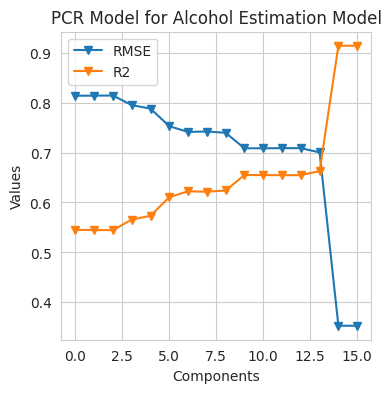

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.plot(RMSE, '-v', label='RMSE')
plt.legend()
plt.plot(R2, '-v',label='R2')
plt.legend()
plt.xlabel('Components')
plt.ylabel('Values')
plt.title('PCR Model for Alcohol Estimation Model');

In [ ]:
X_reduced_train[:,0:best_n_components].shape

(2849, 16)

In [ ]:
scores['estimator']

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [ ]:
best_n_components

16

In [ ]:
lm_estimator = scores['estimator'][9]

In [ ]:
#pcr_model = scores['estimator'][9].fit(X_reduced_train[:,0:best_n_components], y_train)
y_pred = lm_estimator.predict(X_reduced_test[:,0:best_n_components])
print('r2: ', RegressionMetrics.r_squared(y_test, y_pred))
print('RMSE: ', RegressionMetrics.root_mean_squared_error(y_test, y_pred))

r2:  0.9166552615754688
RMSE:  0.3594151746956205


In [ ]:
lm_estimator_test = lm_estimator

In [ ]:
#lm = LinearRegression()

pcr_model = lm_estimator_test.fit(X_reduced_train[:,0:14], y_train)
y_pred = lm_estimator_test.predict(X_reduced_test[:,0:14])
print('r2: ', RegressionMetrics.r_squared(y_test, y_pred))
print('RMSE: ', RegressionMetrics.root_mean_squared_error(y_test, y_pred))

r2:  0.6714746495745836
RMSE:  0.7135785042863325


###Tópico 4

Rede neural MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(learning_rate_init=0.01, random_state=1, max_iter=900, tol=1e-5)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print('r2: ', RegressionMetrics.r_squared(y_test, y_pred))
print('RMSE: ', RegressionMetrics.root_mean_squared_error(y_test, y_pred))


r2:  0.9269347818243251
RMSE:  0.33652137758175177


In [ ]:
from sklearn import model_selection

scoring = ['r2','neg_root_mean_squared_error']

cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 42)

mlp = MLPRegressor(learning_rate_init=0.001, random_state=1, max_iter=900, tol=1e-5)

scores = cross_validate(mlp, X_train, y_train, cv= cv_10, scoring=scoring, return_estimator=True)

In [ ]:
print('r2: ', scores['test_r2'].mean())
print('RMSE: ', -1*scores['test_neg_root_mean_squared_error'].mean())

r2:  0.917894032868789
RMSE:  0.3456126847563728


In [ ]:
y_pred = scores['estimator'][4].predict(X_test)
print('r2: ', RegressionMetrics.r_squared(y_test, y_pred))
print('RMSE: ', RegressionMetrics.root_mean_squared_error(y_test, y_pred))

r2:  0.9236914885059808
RMSE:  0.34390920990148655


No caso de teste o modelo de rede neural MultiLayerPerceptron se saiu com r2
 levemente melhor que a mesma estatística do modelo de regressão linear e um pouco pior do que a regressão linear penalizada.